In [35]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [28]:
x = np.random.beta(1, 1, 50)
y = np.random.beta(1, 1, 50)
true_label = np.where(x+y>=1, 'orange', 'blue')

In [29]:
x=np.insert(x, 0, 0.75)
y=np.insert(y, 0, 0.5)
true_label = np.insert(true_label,0, None) 

In [32]:
data = {
    'x': x,
    'y': y,
    'true_label': true_label
}
df = pd.DataFrame(data)

In [42]:
df

,x,y,true_label
0,0.750000,0.500000,None
1,0.916036,0.179927,orange
2,0.004589,0.727923,blue
3,0.990490,0.876707,orange
4,0.028398,0.871353,blue
5,0.823858,0.266016,orange
6,0.489140,0.675965,orange
7,0.104873,0.942020,orange
8,0.521847,0.204897,blue
9,0.054122,0.632994,blue


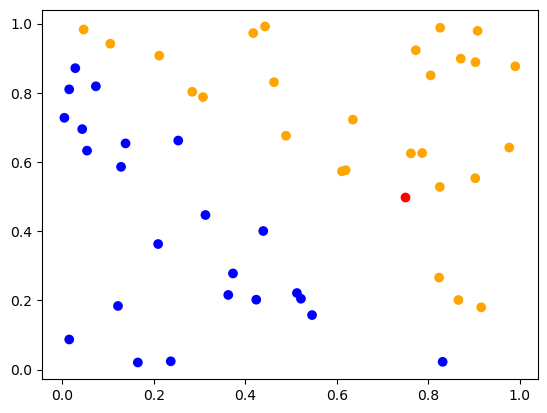

In [41]:
plt.figure()
plt.scatter(df['x'][1:], df['y'][1:], color = df['true_label'][1:])
plt.scatter(df['x'][0], df['y'][0], color = 'red')

In [80]:
def distance(xa, ya, xb, yb):
    point1 = xa+ya
    point2 = xb+yb
    sum_sq = np.sum(np.square(point1 - point2))
    return np.sqrt(sum_sq)

In [81]:
dist = []
index = []
for i in range(1,51):
    dist.append(distance(df['x'][0], df['y'][0], df['x'][i], df['y'][i]))
    index.append(i)

In [82]:
datas = {'distance' : dist,
    'index' : index
}
distance_df = pd.DataFrame(datas)

In [84]:
sorted_df = distance_df.sort_values(by=["distance"])
sorted_df

,distance,index
40,0.043776,41
35,0.053997,36
30,0.065197,31
5,0.084895,6
36,0.103486,37
42,0.108010,43
19,0.130586,20
11,0.137193,12
27,0.140226,28
0,0.154037,1


In [85]:
K=3
nearest = sorted_df[['distance', 'index']][0:3]

In [86]:
nearest

,distance,index
40,0.043776,41
35,0.053997,36
30,0.065197,31


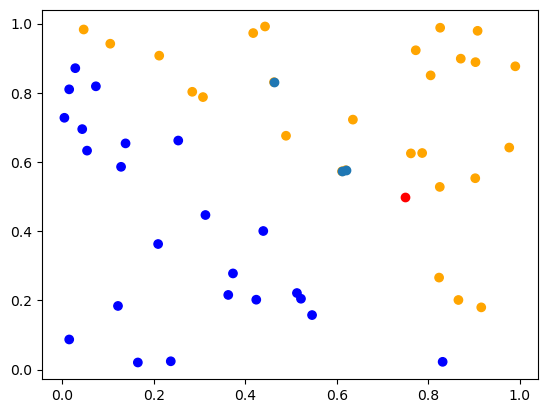

In [87]:
plt.figure()
plt.scatter(df['x'][1:], df['y'][1:], color = df['true_label'][1:])
plt.scatter(df['x'][0], df['y'][0], color = 'red')
plt.scatter(df['x'][nearest['index']], df['y'][nearest['index']])